<a href="https://colab.research.google.com/github/Jennapa-colab/multivariate/blob/main/CH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 4 ทดลองทำ PCA กับ ข้อมูล X แล้ว plotgraph

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [3]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [5]:
X = make_hello(1000)

In [6]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
colorize

{'c': array([4.65390215e-05, 5.38772018e-04, 2.61356305e-03, 5.41450286e-03,
        1.74530786e-02, 2.02463354e-02, 2.20884685e-02, 2.55434869e-02,
        2.75118489e-02, 2.78085221e-02, 3.32797689e-02, 3.61538763e-02,
        3.73264793e-02, 3.96952845e-02, 4.11379837e-02, 4.32443345e-02,
        4.52101464e-02, 4.54145791e-02, 4.64821596e-02, 4.68264429e-02,
        4.84830986e-02, 4.96161451e-02, 5.20076940e-02, 5.23778264e-02,
        5.47296590e-02, 5.75739545e-02, 5.87735546e-02, 6.18264661e-02,
        7.02094535e-02, 7.24407353e-02, 7.35627062e-02, 7.64643777e-02,
        7.65794720e-02, 7.67691073e-02, 7.88421510e-02, 8.02847911e-02,
        8.37364713e-02, 8.72935871e-02, 8.84942061e-02, 8.97035566e-02,
        9.45543442e-02, 9.48310146e-02, 9.67670556e-02, 9.98866485e-02,
        1.01545423e-01, 1.01676507e-01, 1.02568263e-01, 1.02758579e-01,
        1.03247628e-01, 1.06045242e-01, 1.08383970e-01, 1.14609710e-01,
        1.21854745e-01, 1.23823164e-01, 1.24596371e-01, 1.2

In [7]:
X.shape

(1000, 2)

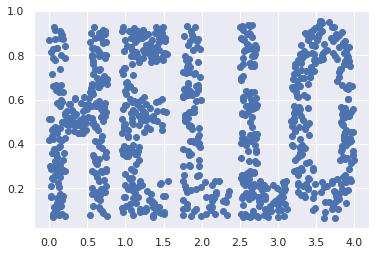

In [8]:
plt.scatter(X[:, 0], X[:, 1])

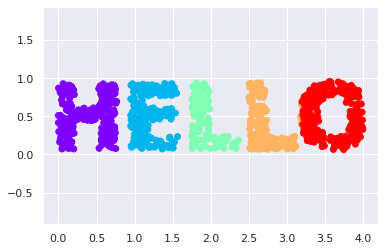

In [9]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal'); 

In [12]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

In [14]:
X2 = rotate(X, 20)+ 5

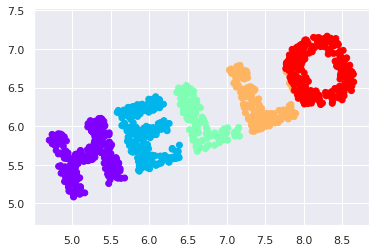

In [15]:
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal'); 

#MDS

In [17]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

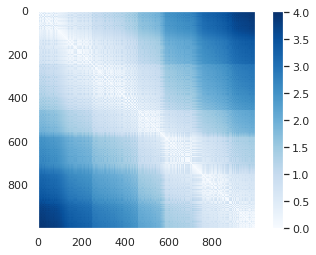

In [18]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [19]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

In [20]:
from sklearn.manifold import MDS

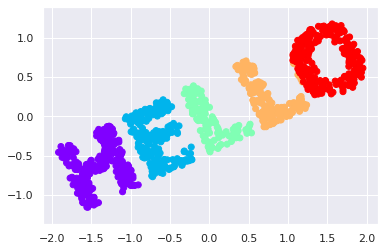

In [21]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) #randomstate กำหนดให้จุดแรกคือตัว fix
#randomstate สามารถกำหนดได้ว่าตัวแรกที่เราคำนวณหรือตัวตั้งต้นเป้นตัวไหน 
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

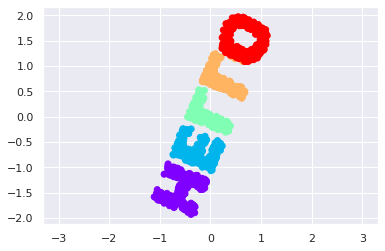

In [22]:
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [24]:
X

array([[4.65390215e-05, 4.16565828e-01],
       [5.38772018e-04, 5.11129139e-01],
       [2.61356305e-03, 8.70669034e-01],
       ...,
       [3.99099756e+00, 4.51739476e-01],
       [3.99173644e+00, 3.50711815e-01],
       [3.99557045e+00, 3.26639249e-01]])

#Quiz 4 ทดลองทำ PCA กับ ข้อมูล X แล้ว plotgraph
และดูผลว่าการกระจายของข้อมูลมันเปลี่ยนไปหรือไม่ อย่างไร

In [25]:
import numpy as np

In [26]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)

In [29]:
new_pca2 = pca.fit_transform(X)

In [ ]:
new_pca2

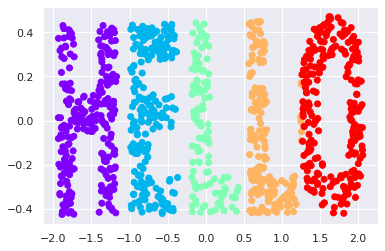

In [30]:
plt.scatter(new_pca2[:,0],new_pca2[:,1], **colorize)

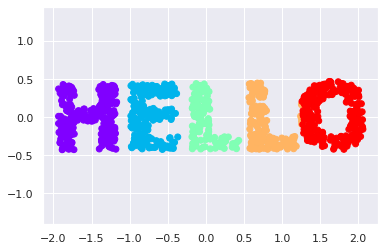

In [31]:
plt.scatter(new_pca2[:, 0], new_pca2[:, 1], **colorize)
plt.axis('equal');

#จะเห็นได้ว่าการกระจายข้อมูลไม่เปลี่ยนแปลงไป